In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/vancouver_real_estate.csv', index_col = 0)
df.reset_index(inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df


,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,"$2,788,000",5 beds,2 baths,"1,653",https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,"$4,800,000",6 beds,4 baths,"4,189",https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,"$6,750,000",4 beds,3 baths,"3,837",https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,"$3,388,000",4 beds,3.5 baths,"2,359",https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,"$6,590,000",5 beds,5.5 baths,"4,190",https://www.redfin.com/bc/vancouver/4022-W-30t...
...,...,...,...,...,...,...,...
11120,1931 East 7TH Ave #1927,V5N 1S3,"$3,598,000",7 beds,5 baths,"3,063",https://www.redfin.com/BC/Vancouver/1931-E-7th...
11121,3311 Sophia St,V5V 3T4,"$2,775,000",6 beds,5.5 baths,"3,073",https://www.redfin.com/bc/vancouver/3311-Sophi...
11122,3778 Wakefield C,V5G 2C4,"$2,190,000",4 beds,2.5 baths,"2,365",https://www.redfin.com/bc/burnaby/3778-Wakefie...
11123,2829 Ash St #101,V5Z 4P5,"$919,000",2 beds,2 baths,924,https://www.redfin.com/bc/vancouver/2829-Ash-S...


In [3]:

# Convert empty strings and None to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert price to float
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype(float)

# Convert bed to integer (using Int64 which supports NaN)
df["bed"] = df["bed"].astype(str).str.extract(r"(\d+)").astype("Int64")

# Convert bath to float (supports half baths)
df["bath"] = df["bath"].astype(str).str.extract(r"(\d+\.?\d*)").astype(float)

# Convert sqr_footage to float, handling missing values properly
df["sqr_footage"] = (
    df["sqr_footage"]
    .astype(str)
    .str.replace(",", "", regex=True)  
)



In [4]:
df

,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,2788000.0,5,2.0,1653,https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,4800000.0,6,4.0,4189,https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,6750000.0,4,3.0,3837,https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,3388000.0,4,3.5,2359,https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,6590000.0,5,5.5,4190,https://www.redfin.com/bc/vancouver/4022-W-30t...
...,...,...,...,...,...,...,...
11120,1931 East 7TH Ave #1927,V5N 1S3,3598000.0,7,5.0,3063,https://www.redfin.com/BC/Vancouver/1931-E-7th...
11121,3311 Sophia St,V5V 3T4,2775000.0,6,5.5,3073,https://www.redfin.com/bc/vancouver/3311-Sophi...
11122,3778 Wakefield C,V5G 2C4,2190000.0,4,2.5,2365,https://www.redfin.com/bc/burnaby/3778-Wakefie...
11123,2829 Ash St #101,V5Z 4P5,919000.0,2,2.0,924,https://www.redfin.com/bc/vancouver/2829-Ash-S...


(array([3.451e+03, 3.515e+03, 2.587e+03, 8.130e+02, 2.740e+02, 1.560e+02,
        1.140e+02, 7.500e+01, 2.600e+01, 3.300e+01, 1.100e+01, 9.000e+00,
        9.000e+00, 5.000e+00, 9.000e+00, 1.400e+01, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   54000.,  1048920.,  2043840.,  3038760.,  4033680.,  5028600.,
         6023520.,  7018440.,  8013360.,  9008280., 10003200., 10998120.,
        11993040., 12987960., 13982880., 14977800., 15972720., 16967640.,
        17962560., 18957480., 19952400., 20947320., 21942240., 22937160.,
        23932080., 24927000., 25921920., 26916840., 27911760., 28906680.,
      

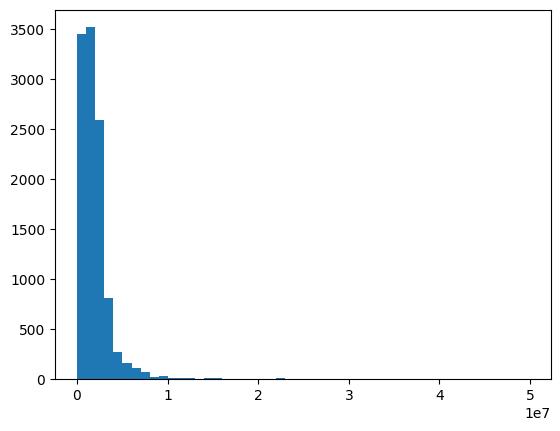

In [8]:
# EDA
plt.hist(df["price"].dropna(), bins=50)

(array([ 456., 4206.,  376.,  485.,  465.,  329.,  208.,  369.,  531.,
         339.,  379.,  448.,  456.,  329.,  458.,  345.,  290.,  293.,
         177.,  186.]),
 array([   0. ,  102.1,  204.2,  306.3,  408.4,  510.5,  612.6,  714.7,
         816.8,  918.9, 1021. , 1123.1, 1225.2, 1327.3, 1429.4, 1531.5,
        1633.6, 1735.7, 1837.8, 1939.9, 2042. ]),
 <BarContainer object of 20 artists>)

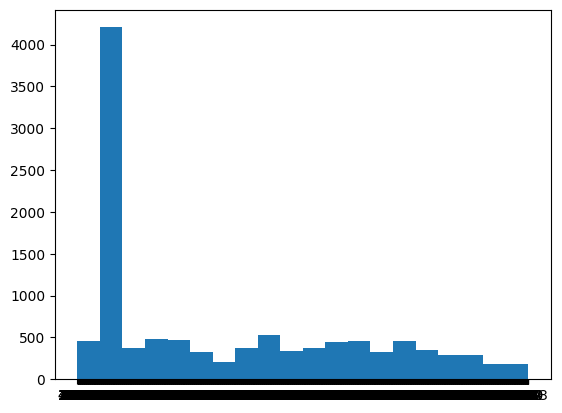

In [13]:
plt.hist(df["sqr_footage"].dropna(), bins=20)

(array([2580., 4872., 1804.,  825.,  670.,  155.,  109.,   33.,   13.,
           9.]),
 array([ 0.5 ,  1.55,  2.6 ,  3.65,  4.7 ,  5.75,  6.8 ,  7.85,  8.9 ,
         9.95, 11.  ]),
 <BarContainer object of 10 artists>)

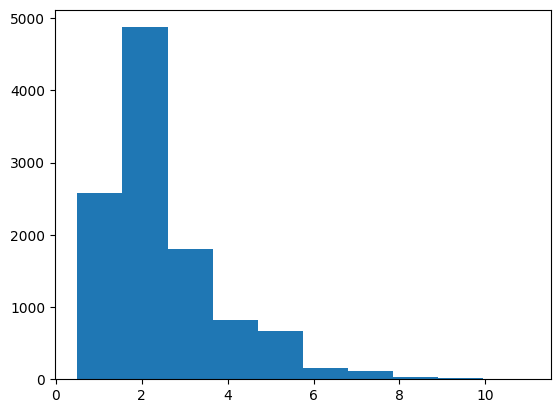

In [12]:
plt.hist(df["bath"].dropna())